<a href="https://colab.research.google.com/github/SCS-Technology-and-Innovation/DACS/blob/main/DTDA/flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
n = 25
m = n + 50

import networkx as nx

attempts = 10
while attempts > 0:
  U = nx.gnm_random_graph(n, m)
  if nx.is_connected(U):
    break
  attempts -= 1

G = U.to_directed(G) # orient the edges

if attempts == 0:
  print('Try again with more edges')
else:
  print('Good to go')

Good to go


In [159]:
from random import randint
low = 1
high = 5
for u, v in G.edges():
  G[u][v]['capacity'] = randint(low, high)

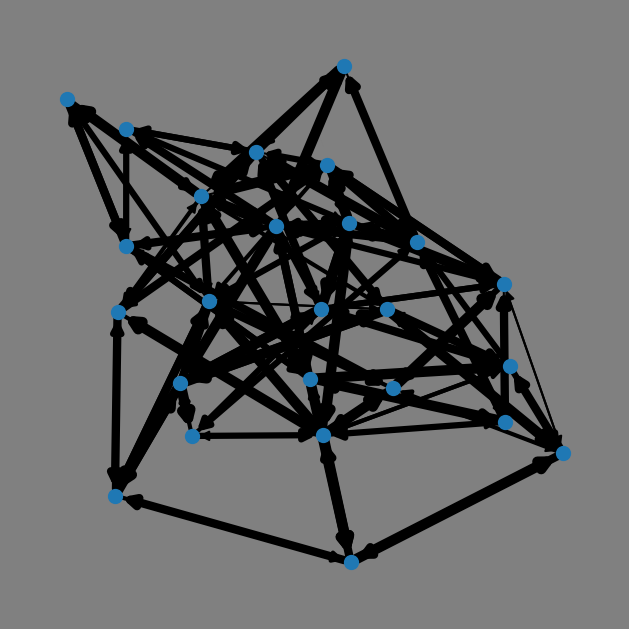

In [160]:
L = nx.spring_layout(G)
w = [ G[u][v]['capacity'] for u, v in G.edges ]

import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (4, 4), dpi =  150)
nx.draw(G, pos = L, width = w, node_size = 40)
fig.set_facecolor('gray')
plt.show()

In [161]:
from random import random

keep = set()
for u in G.nodes():
    for v in G.nodes():
      if (v, u) in keep:
        continue
      if random() < 0.5:
          keep.add((u, v))

for u in G.nodes():
    for v in G.nodes():
      if G.has_edge(u, v):
        if not (u, v) in keep:
          G.remove_edge(u, v)

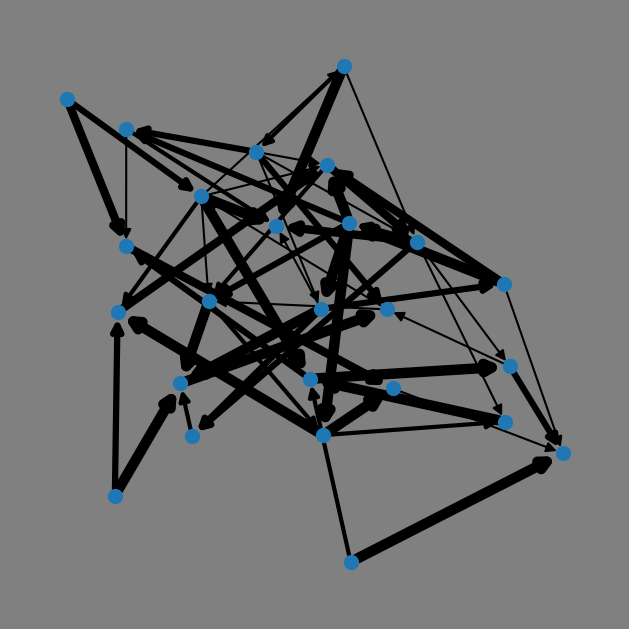

In [162]:
w = [ G[u][v]['capacity'] for u, v in G.edges ]

fig = plt.figure(1, figsize = (4, 4), dpi =  150)
nx.draw(G, pos = L, width = w, node_size = 40)
fig.set_facecolor('gray')
plt.show()

In [163]:
highest = 0
pair = None
config = None

for s in G.nodes():
  for t in G.nodes():
    if s > t:
      maxflow = nx.maximum_flow(G, s, t)
      value = maxflow[0] # maximum flow in units
      flow = maxflow[1] # a dictionary of the flow on each edge (as an adjacency list)
      active = sum( [ sum( [ f > 0 for f in flow[v].values() ] ) for v in flow ] )
      if value > 1 and active > 1: # see the interesting ones (more than one unit flows along two or more edges)
        print(f'A total flow of {value} units from {s} to {t} along {active} edges')
        if value > highest:
            highest = value
            pair = (s, t)
            config = flow

A total flow of 3 units from 3 to 1 along 7 edges
A total flow of 3 units from 3 to 2 along 11 edges
A total flow of 4 units from 4 to 1 along 16 edges
A total flow of 8 units from 4 to 2 along 21 edges
A total flow of 3 units from 6 to 1 along 9 edges
A total flow of 3 units from 6 to 2 along 8 edges
A total flow of 3 units from 6 to 5 along 12 edges
A total flow of 2 units from 7 to 1 along 9 edges
A total flow of 2 units from 7 to 2 along 7 edges
A total flow of 2 units from 7 to 5 along 12 edges
A total flow of 2 units from 7 to 6 along 4 edges
A total flow of 4 units from 8 to 1 along 15 edges
A total flow of 4 units from 8 to 2 along 18 edges
A total flow of 6 units from 8 to 5 along 14 edges
A total flow of 5 units from 8 to 6 along 12 edges
A total flow of 5 units from 8 to 7 along 12 edges
A total flow of 4 units from 9 to 1 along 19 edges
A total flow of 4 units from 9 to 2 along 15 edges
A total flow of 4 units from 9 to 5 along 18 edges
A total flow of 5 units from 9 to 6 a

In [164]:
config

{0: {4: 0, 10: 0},
 1: {6: 1, 11: 0, 21: 0, 20: 0, 5: 0},
 2: {14: 0, 10: 0},
 3: {13: 0, 9: 0, 8: 0},
 4: {20: 0, 18: 0, 3: 0, 6: 0, 2: 0, 13: 0},
 5: {13: 0, 10: 0},
 6: {7: 3, 21: 0},
 7: {16: 0},
 8: {9: 0, 11: 0, 20: 0, 16: 0, 5: 0},
 9: {13: 0, 1: 1, 14: 0, 22: 0, 23: 0},
 10: {24: 0},
 11: {22: 2, 15: 3, 13: 0, 7: 5},
 12: {2: 0, 19: 0},
 13: {},
 14: {16: 0, 19: 0},
 15: {20: 3, 19: 0, 1: 0},
 16: {4: 0, 6: 0},
 17: {7: 0, 18: 0},
 18: {20: 0},
 19: {},
 20: {9: 1, 6: 2},
 21: {18: 0, 24: 0, 23: 0},
 22: {7: 2},
 23: {2: 0},
 24: {19: 0}}

In [165]:
status = dict()
for v in config:
  for (u, units) in config[v].items():
    if units > 0:
      G[v][u]['flow'] = units
      cap = G[v][u]['capacity']
      status[(u, v)] = f'{units}/{cap}'

status

{(6, 1): '1/3',
 (7, 6): '3/5',
 (1, 9): '1/3',
 (22, 11): '2/3',
 (15, 11): '3/3',
 (7, 11): '5/5',
 (20, 15): '3/4',
 (9, 20): '1/4',
 (6, 20): '2/2',
 (7, 22): '2/2'}

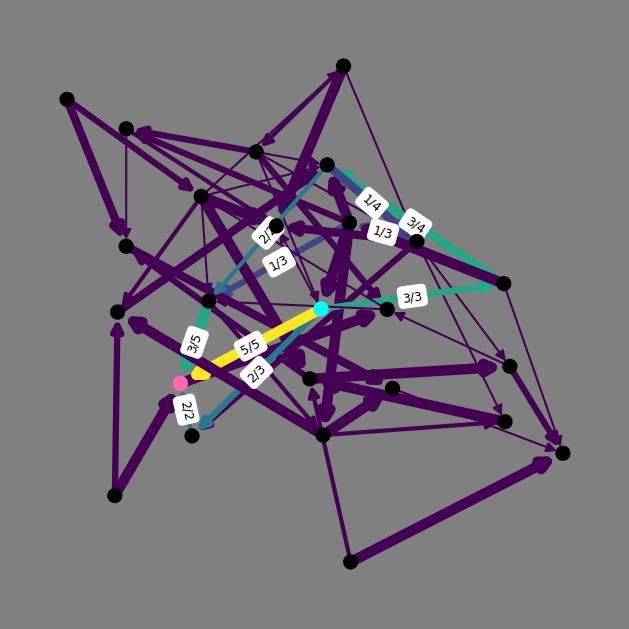

In [166]:
f = [ G[u][v]['capacity'] for u, v in G.edges ]
c = [ G[u][v].get('flow', 0) for u, v in G.edges ]

Vc = [ 'black' for v in G.nodes ]
(s, t) = pair
Vc[s] = 'cyan'
Vc[t] = 'hotpink'

fig = plt.figure(1, figsize = (4, 4), dpi =  150)
nx.draw(G, pos = L, width = w, node_size = 40, node_color = Vc, edge_color = c, cmap = plt.cm.Greens)
nx.draw_networkx_edge_labels(G, L, status, font_size = 6)
fig.set_facecolor('gray')
plt.show()

In [167]:
nothingGoesOut = set()
somethingComesIn = set()

for v in config:
  if sum(config[v].values()) == 0:
    nothingGoesOut.add(v)
  for u in config[v]:
    if config[v][u] > 0:
      somethingComesIn.add(u)

print(nothingGoesOut)
print(somethingComesIn)

pointless = nothingGoesOut - somethingComesIn
print(pointless)

{0, 2, 3, 4, 5, 7, 8, 10, 12, 13, 14, 16, 17, 18, 19, 21, 23, 24}
{1, 6, 7, 9, 15, 20, 22}
{0, 2, 3, 4, 5, 8, 10, 12, 13, 14, 16, 17, 18, 19, 21, 23, 24}


In [168]:
I = G.copy()
for v in pointless:
  I.remove_node(v)

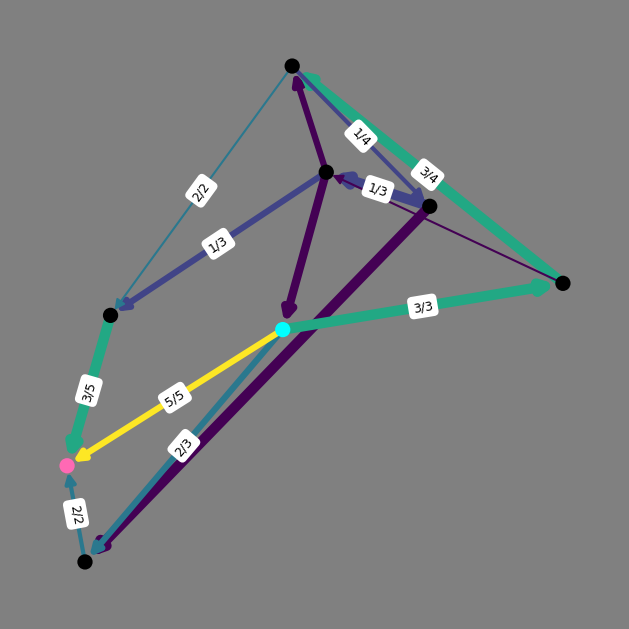

In [169]:
f = [ I[u][v]['capacity'] for u, v in I.edges ]
c = [ I[u][v].get('flow', 0) for u, v in I.edges ]

Vc = [ 'black' if v not in pair else ('cyan' if v == s else 'hotpink') for v in I.nodes ]

fig = plt.figure(1, figsize = (4, 4), dpi =  150)
nx.draw(I, pos = L, width = w, node_size = 40, node_color = Vc, edge_color = c, cmap = plt.cm.Greens)
nx.draw_networkx_edge_labels(I, L, status, font_size = 6)
fig.set_facecolor('gray')
plt.show()